In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy.stats as sp
import statsmodels.api as sm
from pandas.stats.api import ols
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [66]:
import wellapplication as wa

In [67]:
USGS = wa.usgs()

In [107]:
fileplace = "C:/Users/PAULINKENBRANDT/Downloads/Water Use.xlsx"
EphraimUse = pd.read_excel(fileplace,"Sheet2",index_col="date")
EphraimUse.drop(['Year','Month'],axis=1,inplace=True)
EphraimUse['mg'] = EphraimUse['Use (ac-ft)']*0.325851
EphraimUse = EphraimUse[EphraimUse.index.year > 2007]
MonthlyUse = EphraimUse.groupby([EphraimUse.index.month]).mean()
YearlyUse = EphraimUse.groupby([EphraimUse.index.year]).sum()
YearlyUse

,Use (ac-ft)
2008,1667.2
2009,650.9
2010,701.1
2011,2914.9
2012,1985.0
2013,1634.6
2014,1860.9
2015,1945.2


In [100]:
TunnelFlow = pd.read_excel(fileplace,"9319000",index_col="datetime",na_values=['Ssn'])
TunnelFlow = TunnelFlow.resample('1D').mean()
TunnelFlow['vol_acft'] = TunnelFlow['discharge']*(2.29569e-5)*60*60*24
TunnelFlow['vol_mg'] = TunnelFlow['vol_acft']*0.325851
MonthlyFlow = TunnelFlow.groupby([TunnelFlow.index.month]).mean()
YearlyFlow = TunnelFlow.groupby([TunnelFlow.index.year]).sum()
YearlyFlow

,discharge,vol_acft,vol_mg
2008,152.671979,302.821231,98.674601
2009,598.934836,1187.972969,387.102180
2010,336.325140,667.092898,217.372888
2011,769.168646,1525.627672,497.127303
2012,1083.549649,2149.194897,700.317306
2013,861.206086,1708.181741,556.612729
2014,1328.865422,2635.772884,858.869230
2015,585.825042,1161.970006,378.629088
2016,961.754449,1907.617022,621.598914


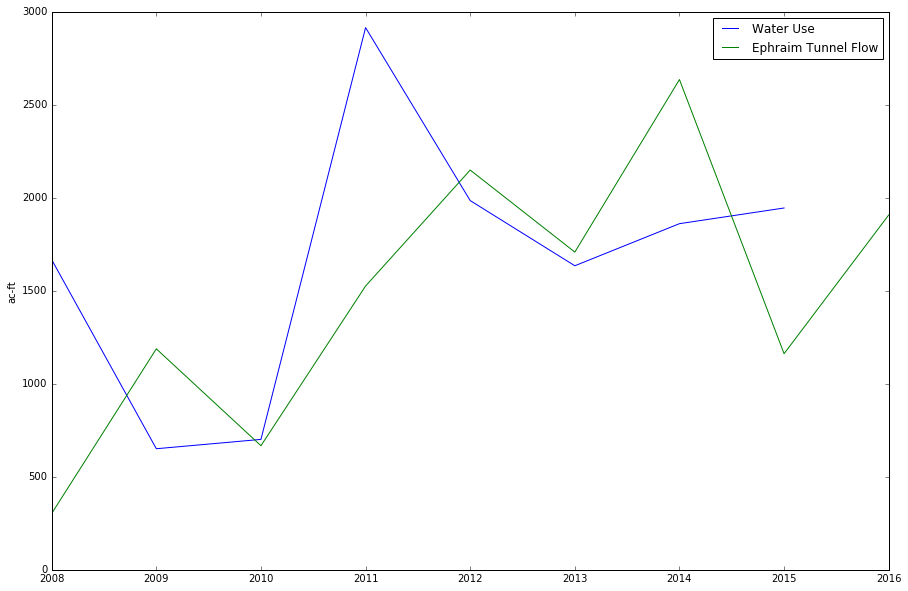

In [115]:
plt.figure()
plt.plot(YearlyUse.index,YearlyUse['Use (ac-ft)'],label='Water Use')
plt.plot(YearlyFlow.index,YearlyFlow.vol_acft, label='Ephraim Tunnel Flow')
x_place=range(2008,2017,1)
x_labs= [str(i) for i in x_place]
plt.xticks(range(2008,2017,1),x_labs )
plt.legend()
plt.ylabel('ac-ft')

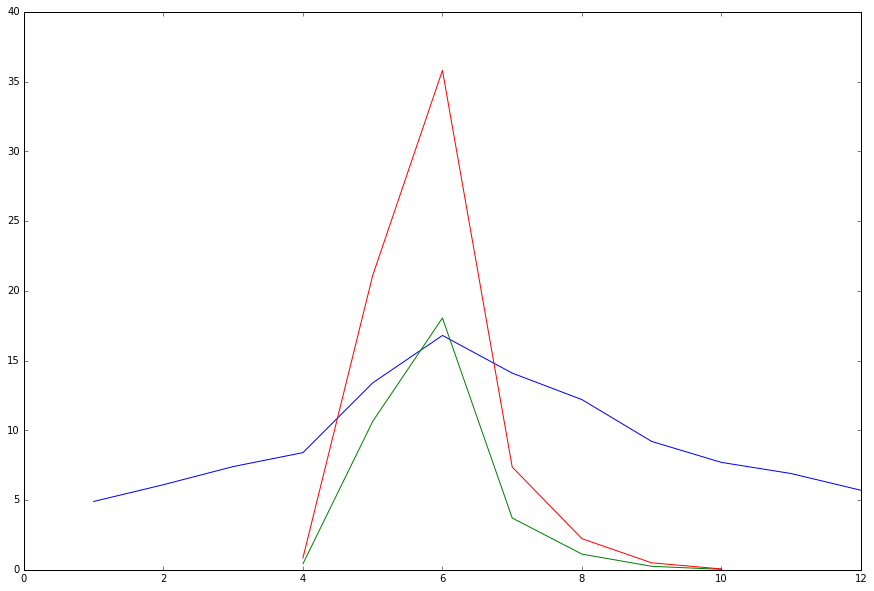

In [97]:
YearlyUse

plt.figure()
plt.plot(MonthlyUse.index,MonthlyUse)
plt.plot(MonthlyFlow.index,MonthlyFlow)

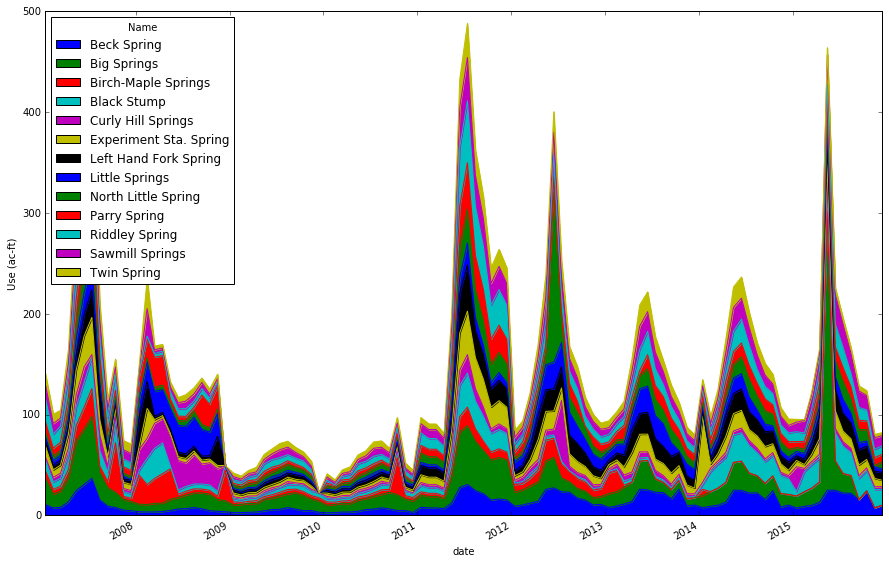

In [62]:
EphraimUse.pivot(columns='Name', values=u'Use (ac-ft)' ).plot.area()
plt.ylabel('Use (ac-ft)')